# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env  # noqa

%run -i $prepare_re_env.__file__ --db-type=temp

2025-06-19 02:04:43.567 INFO: Executing plan <generator object Agent.learn at 0x7f3c9c0947b0>


2025-06-19 02:04:43.570 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f3c9d2ce830> from 'idle' -> 'running'


2025-06-19 02:04:43.571 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-06-19 02:04:43

Persistent Unique Scan ID: '5d7d1d8b-381d-40d8-ba0a-611cd19e0344'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |  brownian1 |  brownian2 |         x3 |

+-----------+------------+------------+------------+------------+------------+------------+

|         1 | 02:04:43.7 |     -0.741 |     -1.175 |     -0.181 |     -0.247 |      0.000 |

|         2 | 02:04:44.2 |     -1.424 |     -4.201 |      0.043 |      0.202 |      0.000 |

|         3 | 02:04:44.7 |     -3.139 |     -2.968 |     -0.033 |      0.201 |      0.000 |

|         4 | 02:04:45.3 |     -4.017 |     -2.437 |     -0.100 |     -0.430 |      0.000 |

|         5 | 02:04:46.0 |     -4.962 |      0.093 |      0.118 |     -0.106 |      0.000 |

|         6 | 02:04:46.7 |     -2.873 |      4.687 |      0.044 |     -0.133 |      0.000 |

|         7 | 02:04:47.3 |     -2.408 |      3.420 |      0.530 |     -0.003 |      0.000 |

|         8 | 02:04:48.0 |     -0.436 |      1.331 |      0.471 |     -0.693 |      0.000 |

|         9 | 02:04:48.7 |      0.188 |      4.019 |      0.789 |     -0.785 |      0.000 |

|        10 | 02:04:49.4 |      4.409 |      2.757 |      0.483 |     -0.637 |      0.000 |

|        11 | 02:04:49.8 |      2.751 |      1.993 |      0.627 |     -0.986 |      0.000 |

|        12 | 02:04:50.3 |      1.963 |      0.761 |      0.369 |     -0.593 |      0.000 |

|        13 | 02:04:50.7 |      3.740 |     -0.588 |      0.361 |     -0.037 |      0.000 |

|        14 | 02:04:51.1 |      1.702 |     -1.855 |     -0.122 |     -0.056 |      0.000 |

|        15 | 02:04:51.5 |      1.137 |     -3.550 |      0.181 |     -0.246 |      0.000 |

|        16 | 02:04:51.8 |      4.109 |     -4.788 |      0.311 |     -0.478 |      0.000 |

+-----------+------------+------------+------------+------------+------------+------------+

generator list_scan ['5d7d1d8b'] (scan num: 1)

/opt/hostedtoolcache/Python/3.10.17/x64/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:171: RuntimeWarning: invalid value encountered in scalar divide
  results = [np.sum(input * grids[dir].astype(float), labels, index) / normalizer for dir in range(input.ndim)]


2025-06-19 02:04:53.579 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f3c9d2ce830> from 'running' -> 'idle'


2025-06-19 02:04:53.580 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f3c9c0947b0>


('5d7d1d8b-381d-40d8-ba0a-611cd19e0344',)

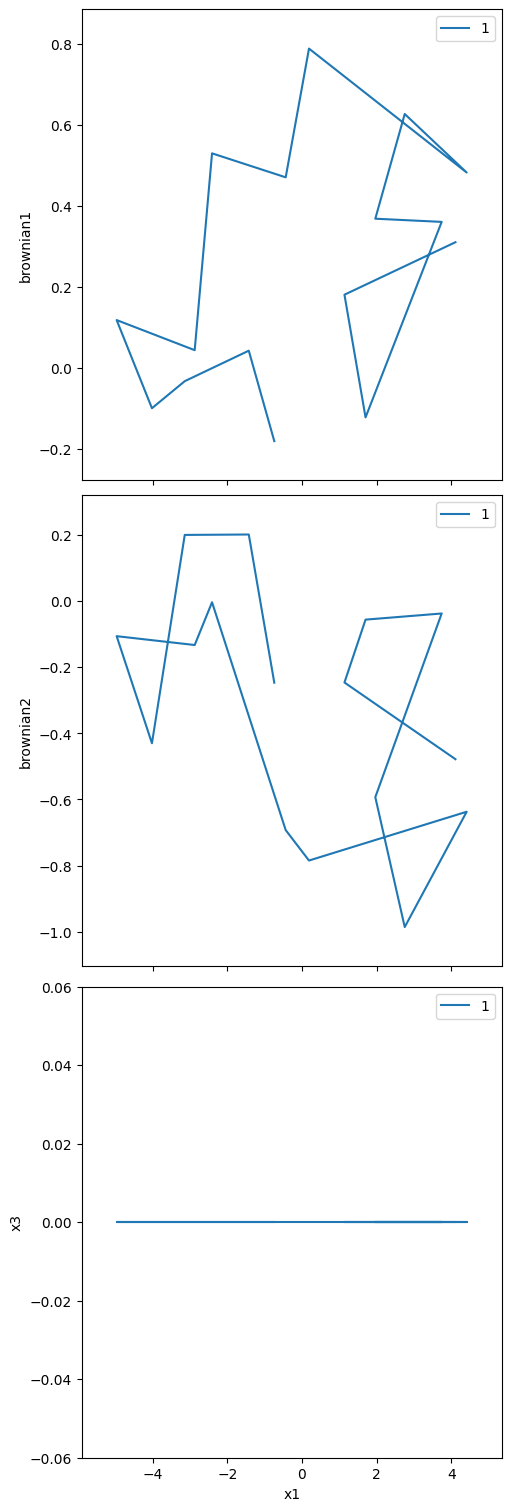

In [2]:
from blop import DOF, Agent, Objective
from blop.digestion.tests import constrained_himmelblau_digestion
from blop.dofs import BrownianMotion

dofs = [
    DOF(name="x1", search_domain=(-5.0, 5.0)),
    DOF(name="x2", search_domain=(-5.0, 5.0)),
    DOF(name="x3", search_domain=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

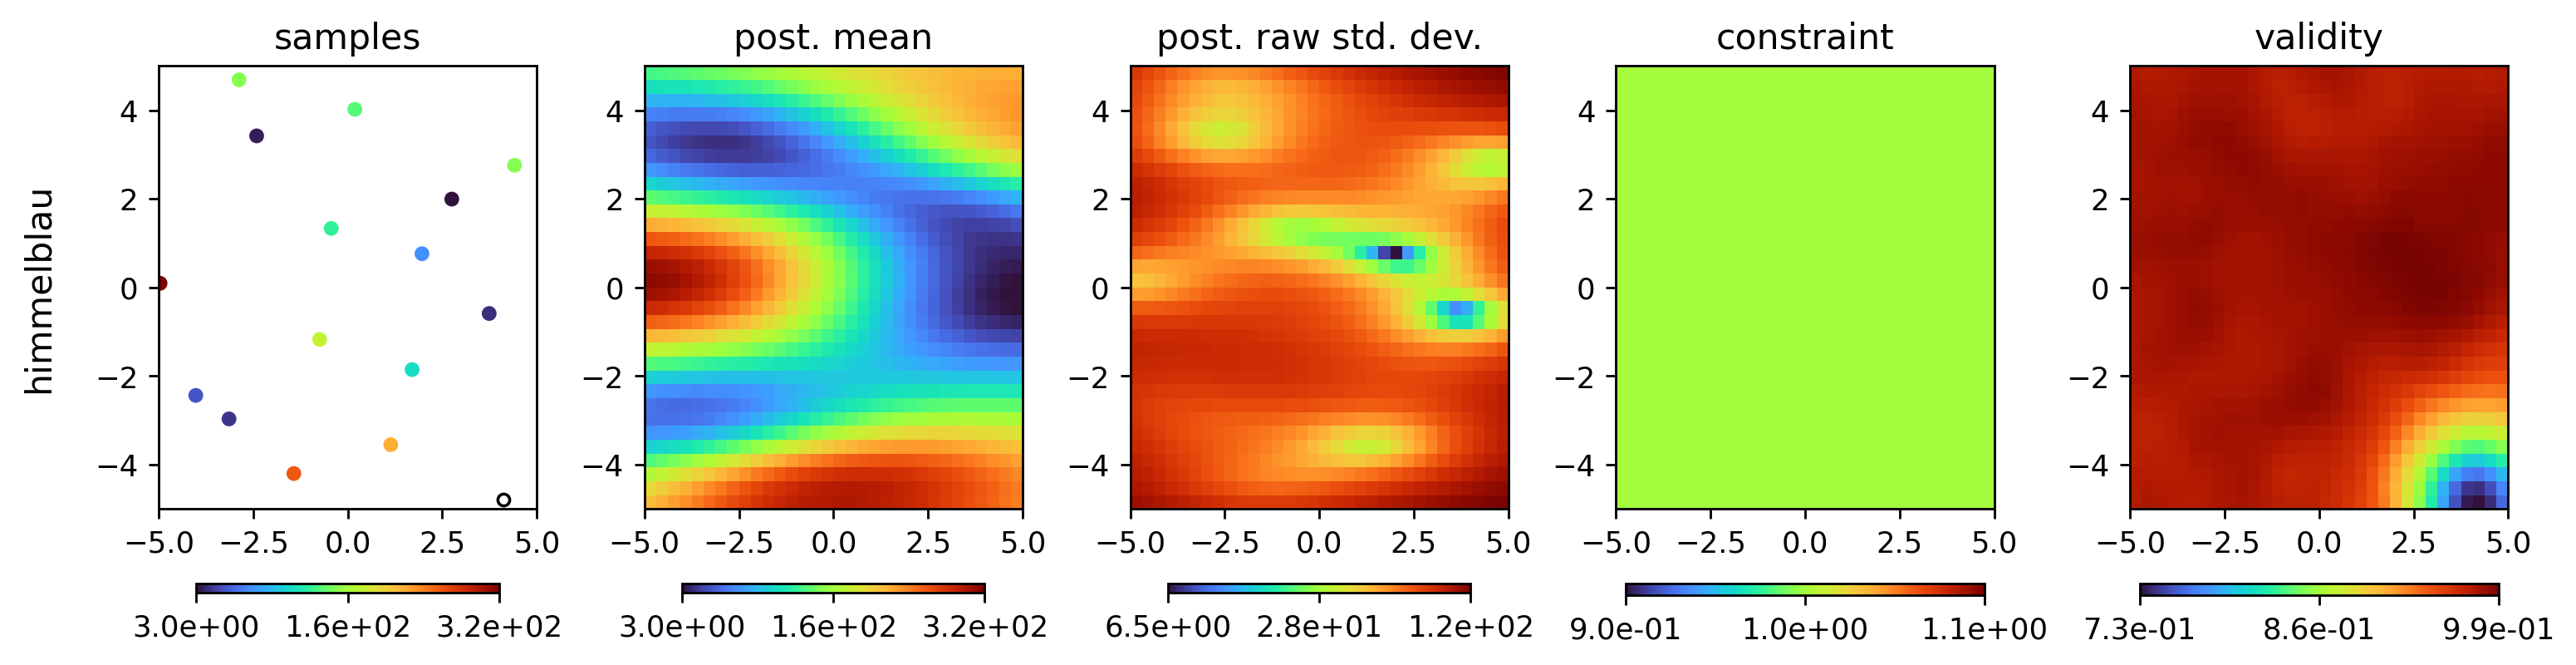

In [3]:
agent.plot_objectives()